In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,load_model
from keras.layers import *
from keras.optimizers import Adam
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
import os
import shutil
import pandas as pd

## Testing the trained model

In [3]:
model = load_model("model.hdf5")

val_path = "./covid19dataset/val/"
test_imgs = []

for img_ in os.listdir(val_path+"/Covid19"):
    img_path = os.path.join(val_path+"/Covid19",img_)
    img = image.load_img(img_path,target_size = (224,224))
    img = image.img_to_array(img)/255.0
    test_imgs.append(img)
    
for img_ in os.listdir(val_path+"/Normal"):
    img_path = os.path.join(val_path+"/Normal",img_)
    img = image.load_img(img_path,target_size = (224,224))
    img = image.img_to_array(img)/255.0
    test_imgs.append(img)

test_imgs = np.array(test_imgs)
print(test_imgs.shape)

(56, 224, 224, 3)


In [4]:
# labels of all the images
# Covid --> 0, Normal --> 1
lth = int(test_imgs.shape[0]/2)
labels = np.hstack((np.zeros(lth),np.ones(lth)))
print(labels.shape)
print(labels)

(56,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
y_pred = []
for i in range(test_imgs.shape[0]):
    img = np.expand_dims(test_imgs[i],axis=0)
    pred = model.predict_classes(img)
    y_pred.append(pred[0][0])

y_pred = np.array(y_pred)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
np.sum(y_pred == labels)/y_pred.shape[0]

0.9821428571428571

## Plotting Confusion Matrix & Classification Report

In [7]:
from sklearn.metrics import classification_report,confusion_matrix
from visualize import plot_confusion_matrix

In [8]:
cnf_matrx = confusion_matrix(labels,y_pred,labels = [0,1])
print(classification_report(labels,y_pred,labels = [0,1]))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.97      1.00      0.98        28

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56



Normalized confusion matrix
[[0.96428571 0.03571429]
 [0.         1.        ]]


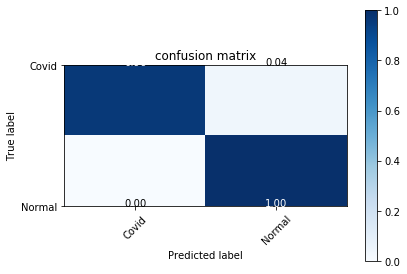

In [9]:
plt.figure(0)
plot_confusion_matrix(cnf_matrx,classes = ["Covid","Normal"],normalize = True,title = "confusion matrix")
plt.show()